<a href="https://colab.research.google.com/github/Muneeb-git-hub/Task-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [7]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (4269, 13)

Missing Values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [14]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


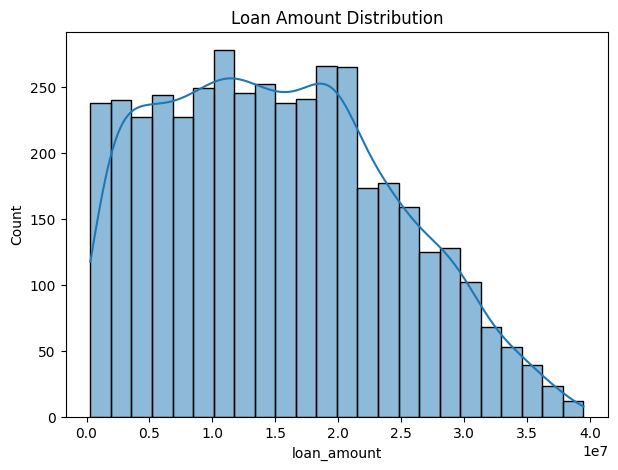

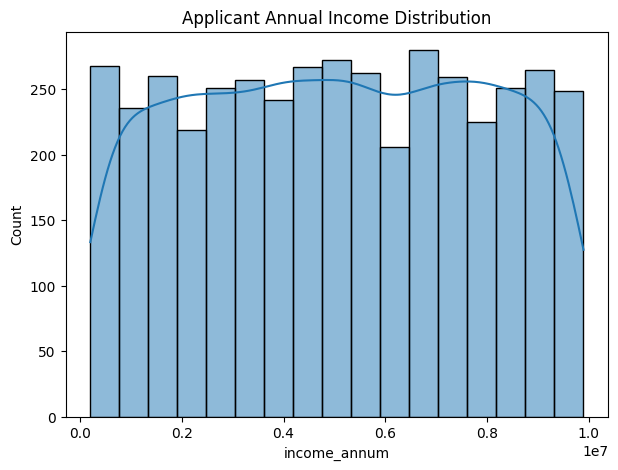

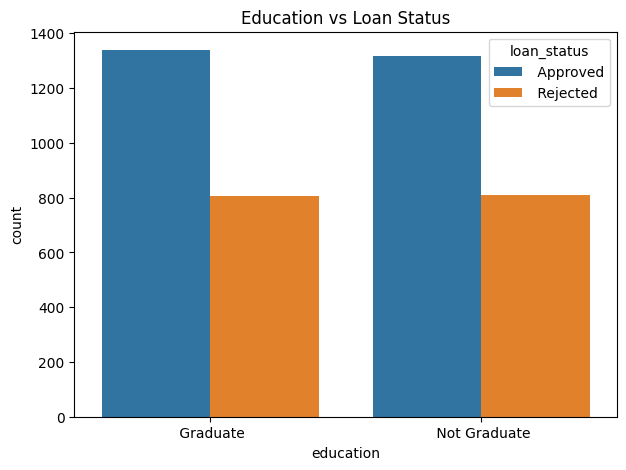

In [16]:
# Exploratory Data Analysis

# Loan Amount Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['loan_amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Income Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['income_annum'], kde=True)
plt.title("Applicant Annual Income Distribution")
plt.show()

# Education vs Loan Status
plt.figure(figsize=(7,5))
sns.countplot(x="education", hue="loan_status", data=df)
plt.title("Education vs Loan Status")
plt.show()

In [19]:
# encoding the data
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])  # Approved = 0, Rejected = 1 (depends on encoding)


In [20]:
df.sample(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3726,3727,2,1,0,8400000,28300000,10,822,1800000,16000000,33000000,4400000,0
3411,3412,3,0,1,6700000,16400000,2,508,4400000,10900000,25300000,9200000,1


In [22]:
# Feature Selection

X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:

#  decision tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)


In [27]:
#  checking accuracy
print("\nDecision Tree Accuracy:", tree_acc)
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.968384074941452
Confusion Matrix (Decision Tree):
 [[516  20]
 [  7 311]]
